In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = None

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [ ]:
def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia euclideana
points = np.random.rand(1000, 3)
kmeans = KMeans(k=3, max_iter=100)

labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[2 0 0 1 2 2 2 0 1 2 2 2 2 0 0 1 2 2 1 1 2 0 0 2 0 0 1 0 2 2 1 1 1 1 1 1 2
 0 1 0 2 2 0 0 1 0 0 2 1 1 1 1 2 0 1 2 2 1 0 1 1 1 2 1 1 2 2 0 1 1 1 0 2 2
 2 0 0 1 2 1 2 1 2 2 0 2 1 0 1 1 2 2 2 1 0 1 0 0 1 2 0 1 1 1 0 0 2 1 1 2 0
 0 2 2 2 0 1 1 0 2 1 0 2 0 2 1 1 1 2 0 2 1 2 1 1 2 1 1 1 0 1 2 2 1 2 0 1 0
 2 2 0 1 2 2 0 1 0 0 1 1 2 0 2 0 0 0 0 1 1 2 1 2 0 0 1 2 0 1 2 2 2 0 0 1 0
 1 0 1 0 0 1 2 0 1 0 2 2 1 0 2 2 1 2 1 1 0 1 2 2 1 0 2 0 2 2 1 0 0 1 1 2 2
 1 1 2 2 2 2 0 2 2 0 1 0 0 2 0 2 2 0 1 2 0 0 1 2 1 1 1 0 1 2 1 2 2 1 2 2 0
 0 2 1 0 1 1 2 0 0 2 2 1 2 2 2 1 0 0 2 2 2 2 2 1 2 2 2 0 0 2 0 0 2 1 0 1 2
 0 0 0 2 2 1 0 2 1 2 2 1 2 2 0 2 2 1 1 0 2 2 0 0 1 0 1 2 0 0 1 2 1 2 2 1 2
 2 0 0 2 2 0 2 0 1 1 0 1 0 2 0 0 0 2 0 1 2 0 1 2 1 1 0 1 2 0 0 1 2 0 0 2 1
 0 2 2 2 2 0 0 1 2 2 0 2 2 1 2 1 2 0 2 2 1 2 1 1 2 1 2 1 0 2 0 1 1 2 0 0 0
 0 1 1 1 1 1 2 2 2 0 1 0 1 2 0 0 0 0 2 1 1 2 2 2 2 1 1 2 2 2 0 1 2 1 2 2 1
 1 2 2 2 0 1 0 2 2 1 2 1 2 0 2 1 2 0 2 0 1 0 2 2 0 2 0 0 1 2 1 0 1 2 1 2 2
 1 1 1 2 0 1 0 0 0 1 2 1 

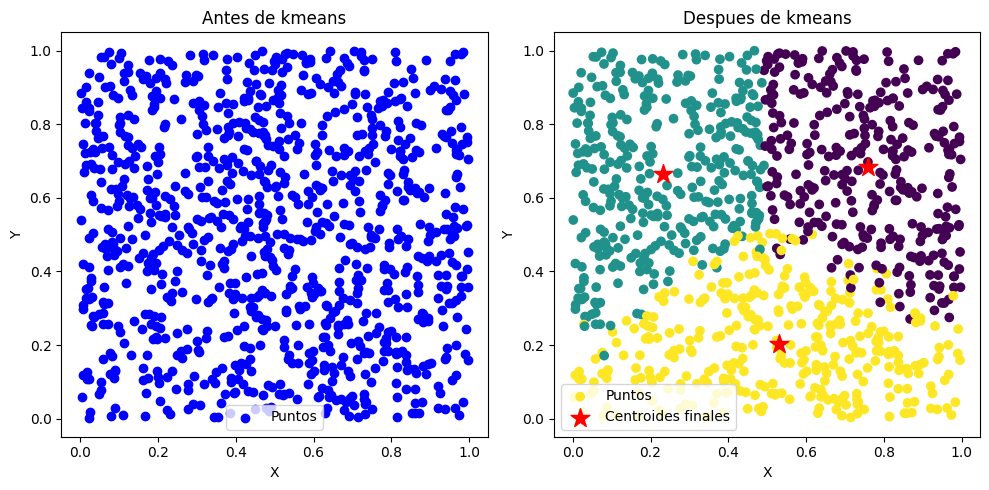

In [ ]:
dibujar2D(points, kmeans.centroids, labels)

In [ ]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia de Manhattan
points = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(k=2)
labels = kmeans.run(points, tipo_distance="mahalanobis")
print(labels)
print(kmeans.centroids)

[1 0 1 0 0 0]
[[4.875 5.35 ]
 [3.    5.   ]]


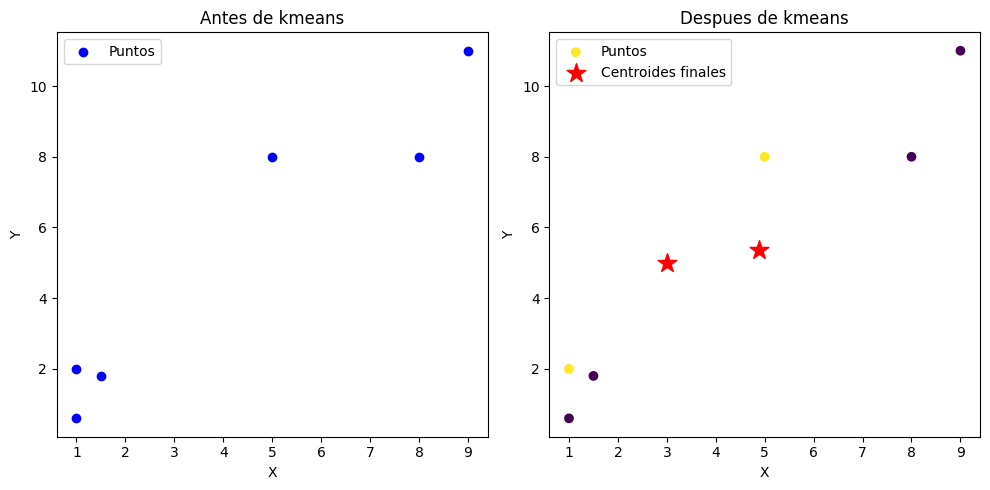

In [ ]:
dibujar2D(points, kmeans.centroids, labels)

In [ ]:
# Ejemplo de uso (datos con 3 caracteristicas)
points = np.random.rand(1000, 3)
kmeans = KMeans(k=3, max_iter=10)

labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[2 2 1 1 1 1 0 0 0 1 2 2 2 2 1 0 1 0 0 1 1 2 2 2 2 0 0 0 1 2 1 1 2 2 2 0 1
 2 1 2 1 2 1 2 2 0 0 2 1 0 1 1 2 0 1 0 0 0 1 1 0 0 2 0 2 1 1 1 2 2 1 1 0 2
 1 2 0 0 0 1 2 0 1 1 2 1 0 0 2 2 0 0 1 1 2 0 0 2 0 2 1 2 1 2 2 1 0 0 0 0 1
 1 2 0 2 1 2 1 2 1 1 0 0 1 1 2 2 1 0 1 1 1 2 2 0 1 2 0 0 2 1 1 2 2 1 1 1 1
 1 2 2 1 2 0 2 1 1 0 1 2 0 0 1 1 0 1 1 1 0 0 1 1 2 2 2 0 1 1 0 1 1 2 2 1 1
 1 2 2 2 0 2 1 1 2 2 2 0 1 2 0 2 1 2 2 2 2 2 2 2 2 1 2 1 1 1 0 1 2 1 2 1 0
 0 1 2 1 1 2 1 0 2 2 1 2 2 0 0 2 0 2 1 2 1 2 1 1 2 1 0 2 2 1 1 1 1 2 2 2 1
 2 2 1 1 2 0 0 1 1 1 1 2 1 2 2 0 1 1 2 2 1 1 2 1 0 2 0 0 0 0 1 2 2 0 2 0 2
 1 0 0 1 0 1 1 2 2 0 2 0 0 2 2 1 0 0 2 2 2 0 1 2 1 2 2 1 1 2 0 0 0 2 0 2 0
 1 2 0 0 2 2 2 0 2 2 1 1 2 2 1 1 0 1 0 2 1 0 0 1 0 1 1 1 1 0 0 0 0 2 1 1 2
 0 1 2 1 1 2 1 2 2 2 1 1 2 0 1 0 0 1 2 2 1 2 2 0 0 1 1 0 0 1 0 1 0 2 0 1 0
 2 2 2 1 1 0 2 1 2 2 1 1 1 0 1 1 0 1 1 2 0 2 1 2 0 2 1 0 0 0 2 2 2 1 0 2 1
 2 0 2 1 2 1 2 1 0 1 2 2 1 0 0 1 2 1 1 0 1 2 0 1 2 0 2 2 0 2 1 2 1 1 0 1 0
 0 0 1 0 2 2 1 2 0 0 1 1 

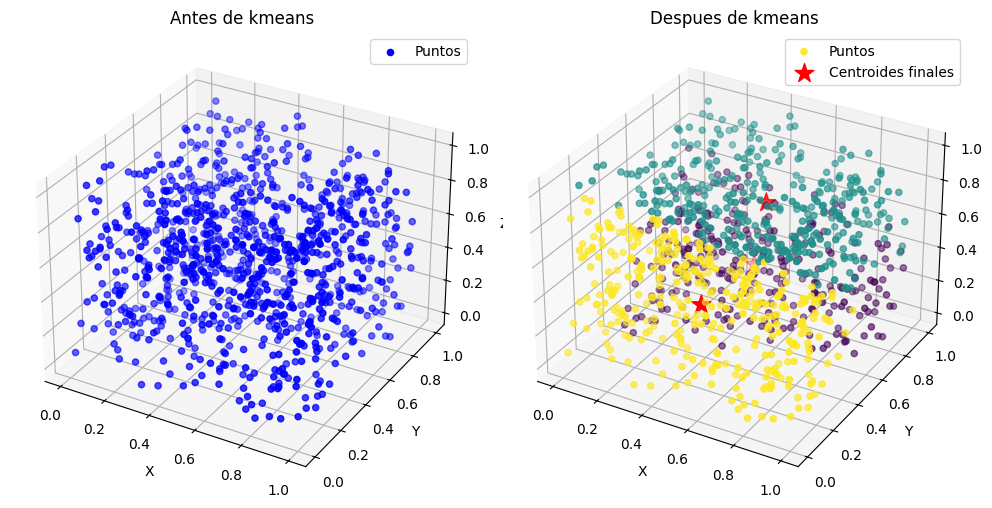

In [ ]:
dibujar3D(points, kmeans.centroids, labels)

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 500,n_features = 2,centers = 4,random_state = 23)

In [ ]:
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[1 0 0 1 0 1 2 0 2 2 2 2 0 0 0 0 1 2 2 0 2 0 2 0 0 0 2 0 2 1 2 2 2 2 1 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 0 1 1 0 1 0 0 0 0 1 2 0 0 2 1 0 0 0 0 0 2 0 0 0
 2 1 1 0 0 2 0 2 0 2 0 1 0 0 1 2 0 1 2 2 0 2 1 0 0 0 0 2 0 0 0 1 1 0 1 0 0
 2 0 0 0 2 2 1 2 0 1 0 0 1 0 0 2 0 0 1 1 2 0 0 0 1 1 1 1 0 2 0 1 1 0 2 0 0
 0 0 0 2 0 0 2 1 2 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 2 0 0 0 2 0 1 0 1 1
 0 2 1 1 2 2 1 2 0 2 1 0 0 1 0 2 0 0 0 2 0 0 1 0 0 2 0 0 0 1 2 0 0 2 0 1 0
 1 0 2 1 0 1 2 1 0 0 0 0 0 2 0 1 0 0 0 0 2 0 0 2 2 1 0 0 0 0 1 0 1 0 1 0 2
 2 2 0 0 1 0 1 0 1 2 2 0 0 2 1 2 1 1 0 1 2 0 1 0 2 2 1 1 0 0 1 0 0 2 2 0 2
 0 1 2 0 1 0 0 2 1 0 2 0 1 0 2 1 0 0 0 1 1 0 1 2 0 0 0 0 0 2 1 0 1 0 0 0 0
 2 1 2 2 0 2 0 0 0 2 0 0 1 1 1 0 0 0 1 1 2 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1
 2 0 1 0 2 2 0 1 1 0 2 2 0 1 0 2 2 0 0 0 0 2 2 2 0 0 2 1 0 1 0 0 0 1 2 0 1
 0 0 0 2 2 0 0 1 2 2 2 0 0 2 1 2 1 0 2 1 0 0 1 0 2 0 1 2 2 0 0 2 1 1 0 1 0
 2 2 0 1 1 2 0 2 2 0 2 0 1 1 1 0 1 0 0 0 2 2 1 0 0 0 2 2 1 2 1 2 0 0 2 0 0
 0 0 1 1 2 0 1 0 0 0 2 1 

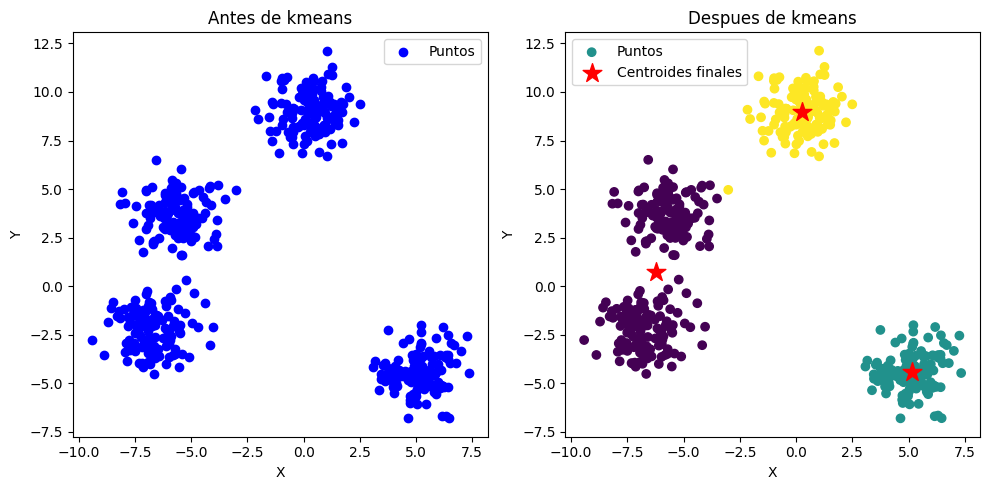

In [ ]:
dibujar2D(points, kmeans.centroids, labels)

ACTIVIDAD

punto 1: 1000 muestras 2D K3 Distancia encladiana max iteraciones=10, 100, 1000, 10000

10 iteraciones

[[ 5.22054811 -4.40112225]
 [-6.13679573  0.75462667]
 [ 0.18853061  8.88834114]]


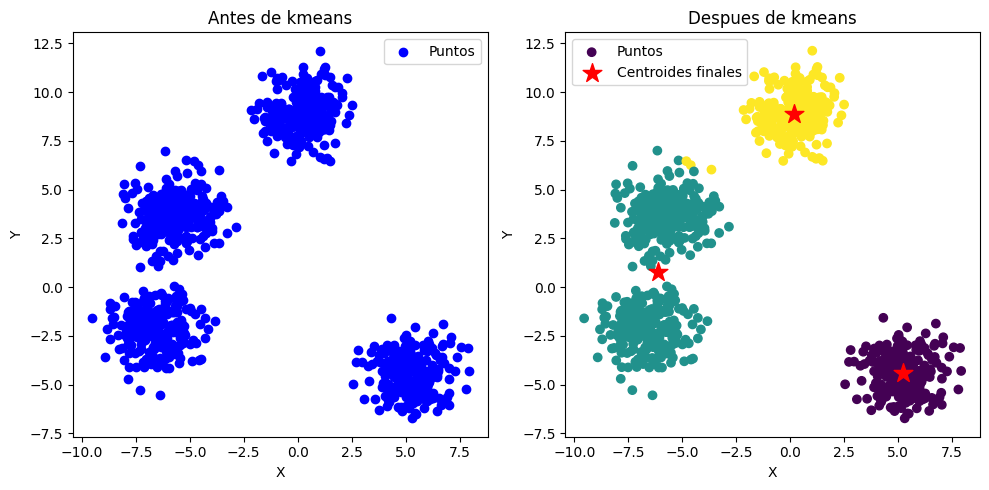

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)

100 iteraciones

[[ 0.14926918  8.86739812]
 [-6.14212703  0.73255201]
 [ 5.22054811 -4.40112225]]


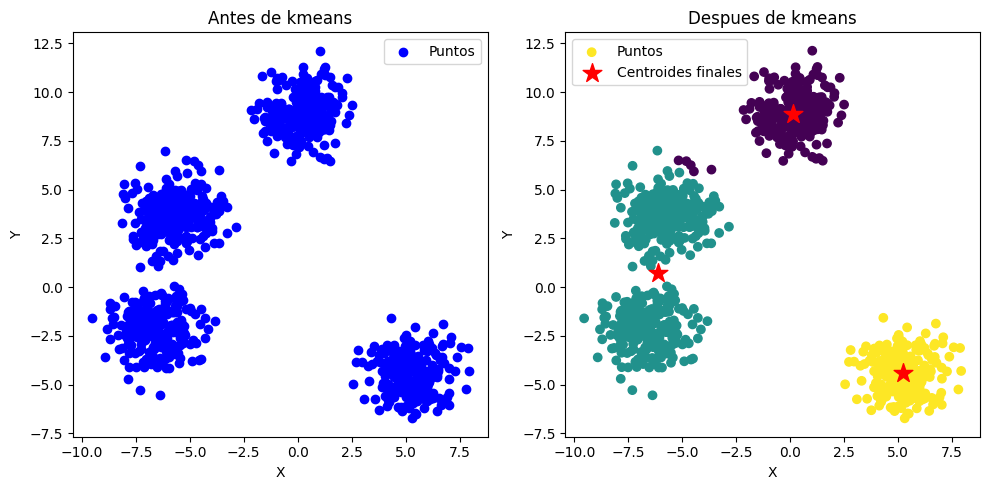

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)

1000 iteraciones

[[ 0.18853061  8.88834114]
 [ 5.22054811 -4.40112225]
 [-6.13679573  0.75462667]]


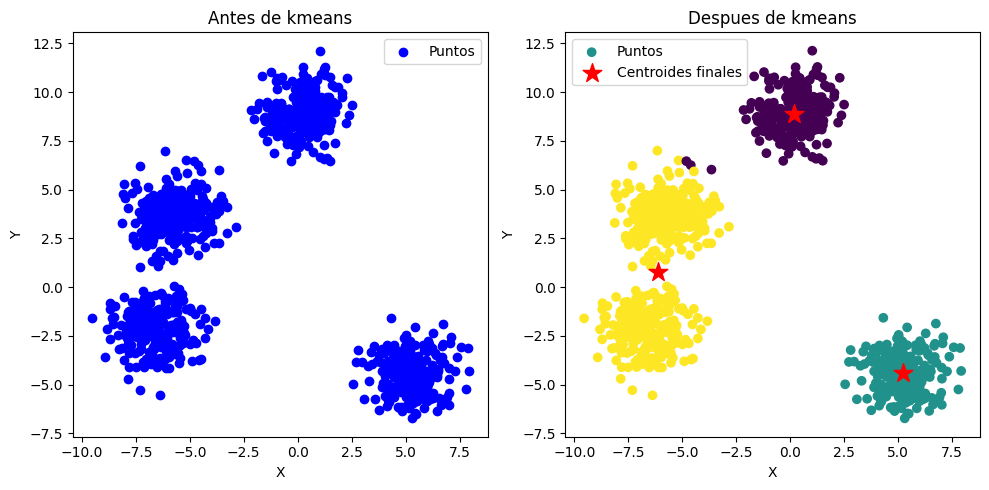

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)

10000 iteraciones

[[ 0.14926918  8.86739812]
 [ 5.22054811 -4.40112225]
 [-6.14212703  0.73255201]]


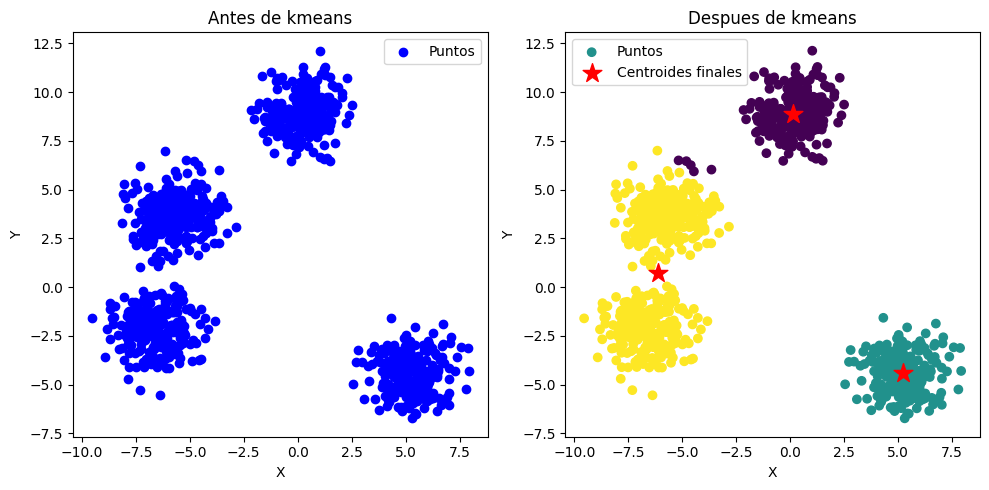

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)

punto 2: 100 muestra 3D K=3 distancia eucladiana max iteraciones= 10, 100, 1000, 10000

10 iteraciones

[[-1.87489628 -9.98410468  7.55642675]
 [ 0.28513392  8.92425092  5.20691558]
 [-5.59637388 -3.77444934  2.9720632 ]]


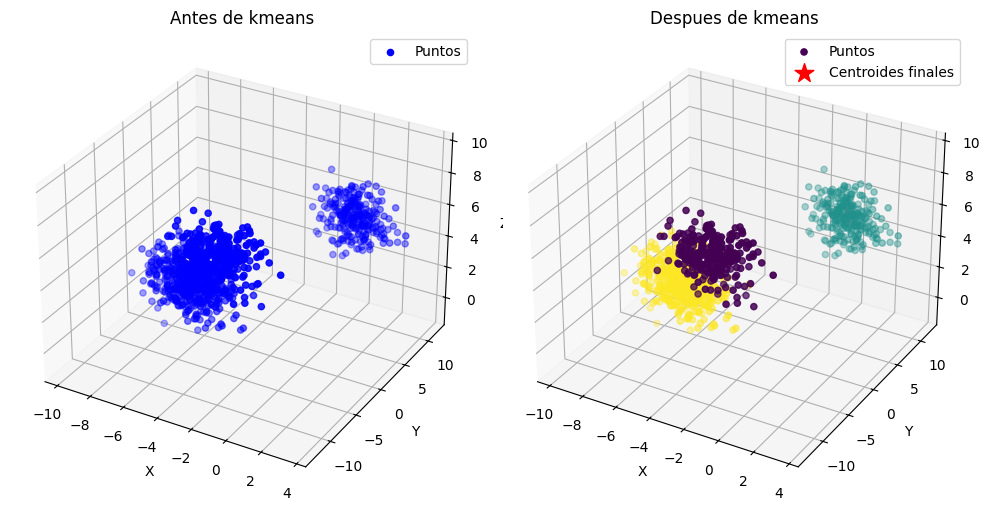

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

100 iteraciones

[[-5.59637388 -3.77444934  2.9720632 ]
 [ 0.28513392  8.92425092  5.20691558]
 [-1.87489628 -9.98410468  7.55642675]]


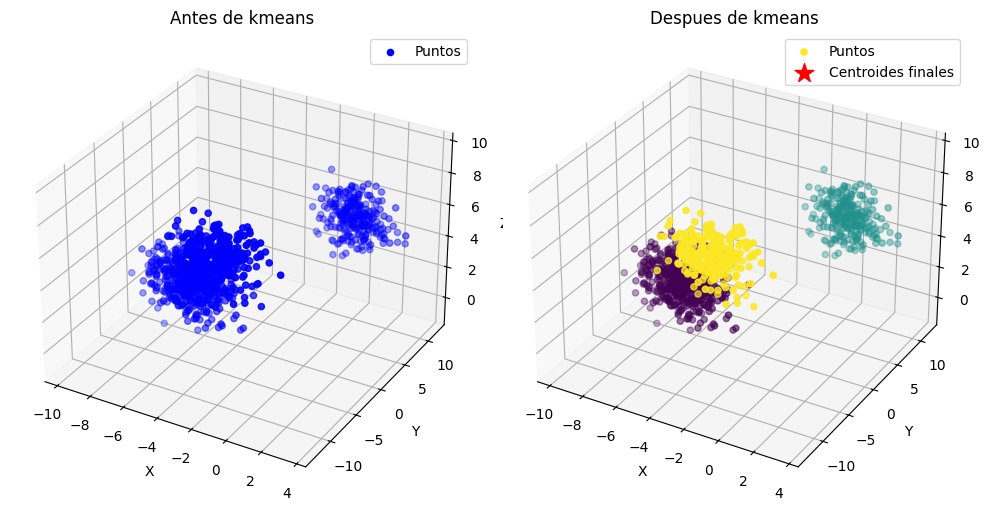

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

1000 iteraciones

[[-4.33107149 -5.88573215  4.53074681]
 [ 0.59678331  8.8968588   4.38365754]
 [ 0.03220108  8.9464822   5.87506704]]


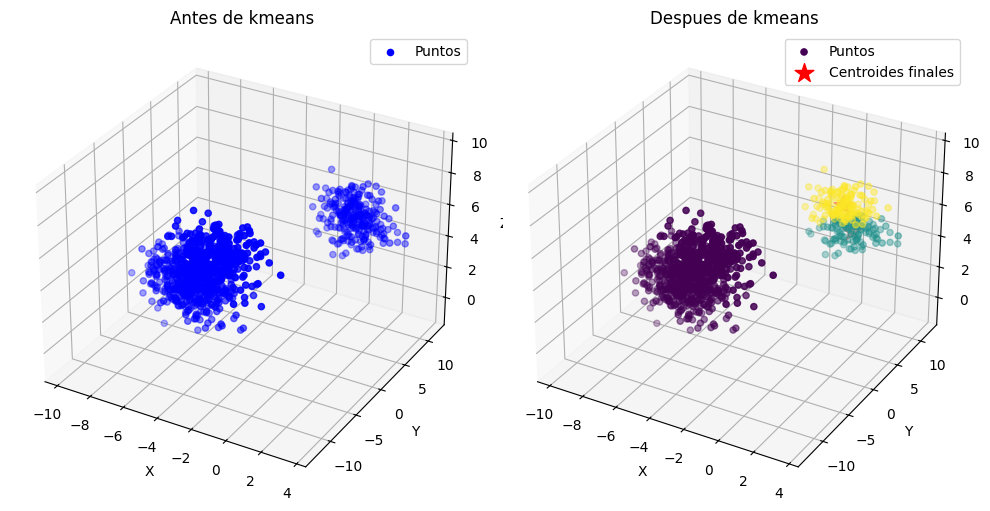

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

10000 iteraciones

[[ 0.28513392  8.92425092  5.20691558]
 [-1.87489628 -9.98410468  7.55642675]
 [-5.59637388 -3.77444934  2.9720632 ]]


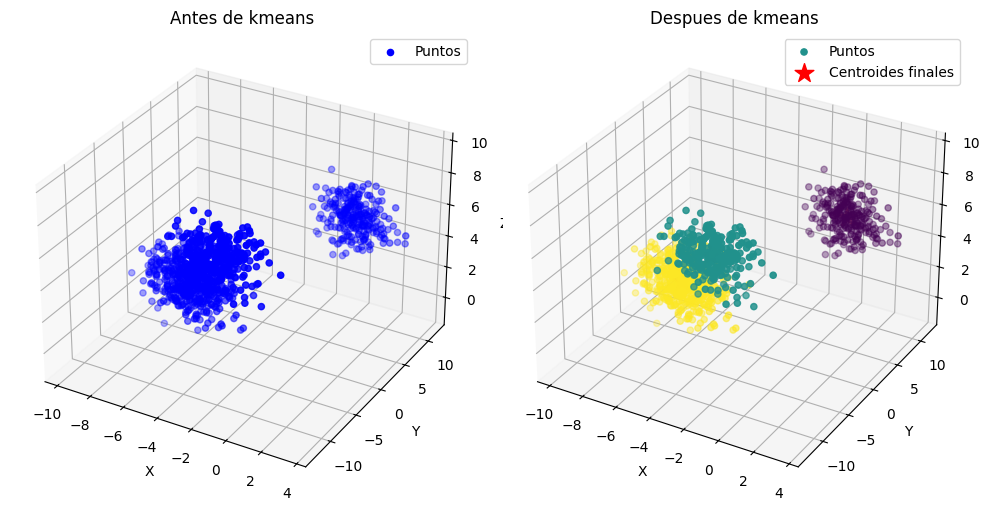

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

Punto 3: 1000 muestras 10D K=3 distancia eucladiana max iteraciones= 10, 100, 1000, 10000

10 iteraciones

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)


[[  6.5232213    4.38290001  -7.61461494   1.83942529  -7.37684894
   -8.43656566   6.61427073  -0.80877943  -6.73114212   0.89878175]
 [ -4.85507109   8.26243131   6.48367942  -4.29927416  -1.96925994
    6.62204892   0.04661193  -5.34010847  -0.92271724  -2.93452185]
 [  6.41163915   2.6015104   -7.90808704 -10.05064186   8.85906228
   -7.14835754  -1.63054815  -2.9802315    7.33872176  -1.36617414]]


100 iteraciones

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[ -4.85507109   8.26243131   6.48367942  -4.29927416  -1.96925994
    6.62204892   0.04661193  -5.34010847  -0.92271724  -2.93452185]
 [  6.41163915   2.6015104   -7.90808704 -10.05064186   8.85906228
   -7.14835754  -1.63054815  -2.9802315    7.33872176  -1.36617414]
 [  6.5232213    4.38290001  -7.61461494   1.83942529  -7.37684894
   -8.43656566   6.61427073  -0.80877943  -6.73114212   0.89878175]]


1000 iteraciones

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[ -4.85507109   8.26243131   6.48367942  -4.29927416  -1.96925994
    6.62204892   0.04661193  -5.34010847  -0.92271724  -2.93452185]
 [  6.5232213    4.38290001  -7.61461494   1.83942529  -7.37684894
   -8.43656566   6.61427073  -0.80877943  -6.73114212   0.89878175]
 [  6.41163915   2.6015104   -7.90808704 -10.05064186   8.85906228
   -7.14835754  -1.63054815  -2.9802315    7.33872176  -1.36617414]]


10000 iteraciones

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 10,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[  6.46743022   3.4922052   -7.76135099  -4.10560829   0.74110667
   -7.7924616    2.49186129  -1.89450546   0.30378982  -0.23369619]
 [-10.02840443   7.68465445   7.65965393  -4.15131199   1.70703965
    9.57025198   6.9194212   -8.58774896  -4.19592485  -4.19288259]
 [  0.31826225   8.84020816   5.3077049   -4.44723633  -5.64555953
    3.67384586  -6.82619734  -2.09246799   2.35049037  -1.67616111]]


punto 4: 1000 muestras 100D k=3  distancia eucladiana max iteraciones= 10, 100, 1000, 10000

10 iteraciones

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[-8.66450779  4.52166177 -7.56625305  6.210034    8.71909492 -3.16774364
  -3.78039941  1.97523348  3.93706863 -9.09308048  2.45321869 -6.61120957
  -8.43029548 -3.77580495 -1.63761173 -2.12915348  4.40979787  0.22204306
  -3.12803545 -0.58586543  0.9419653   6.71797143 -3.01283007  5.68687331
   2.93997049  7.46247522 -1.83324408 -6.31929766 -8.2370414   1.11948783
   9.51774637 -4.05525822 -2.15529764  6.30627532 -2.0123147   7.82369977
  -9.33426049  7.87353153 -4.17846605  9.63404477  5.47773861  6.31515679
  -0.45123904 -3.9219301  -3.44366006  7.65306357 -1.43803902 -9.98836141
   2.42873296  2.75221614  1.96909477 -8.32978852 -6.30753753  5.44041875
   1.87944931  3.57540091 -8.52946575  1.13767696 -4.828454   -5.57849729
  -7.73254993 -8.05057105 -5.07759937  4.96843335  1.92376118  0.74191374
  -2.48917942 -5.21121284  1.89912183  6.8207713  -0.42557516 -8.25281183
   8.64489123 -0.42550856 -7.56826266  6.73303162 -2.30102586 -7.86441478
   9.09740667 -3.02250411 -5.77131218 

100 iteraciones

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[ -8.66450779   4.52166177  -7.56625305   6.210034     8.71909492
   -3.16774364  -3.78039941   1.97523348   3.93706863  -9.09308048
    2.45321869  -6.61120957  -8.43029548  -3.77580495  -1.63761173
   -2.12915348   4.40979787   0.22204306  -3.12803545  -0.58586543
    0.9419653    6.71797143  -3.01283007   5.68687331   2.93997049
    7.46247522  -1.83324408  -6.31929766  -8.2370414    1.11948783
    9.51774637  -4.05525822  -2.15529764   6.30627532  -2.0123147
    7.82369977  -9.33426049   7.87353153  -4.17846605   9.63404477
    5.47773861   6.31515679  -0.45123904  -3.9219301   -3.44366006
    7.65306357  -1.43803902  -9.98836141   2.42873296   2.75221614
    1.96909477  -8.32978852  -6.30753753   5.44041875   1.87944931
    3.57540091  -8.52946575   1.13767696  -4.828454    -5.57849729
   -7.73254993  -8.05057105  -5.07759937   4.96843335   1.92376118
    0.74191374  -2.48917942  -5.21121284   1.89912183   6.8207713
   -0.42557516  -8.25281183   8.64489123  -0.42550856  -7.568262

1000 iteraciones

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[ 3.72913345  2.91911304 -0.9112552  -5.38659015 -6.17973192  1.12093952
  -2.39367331 -5.15038321 -3.49655474 -5.04124285 -7.21489538  2.2397881
   6.62820859  0.40352198 -3.00050528  4.51737597  4.87530494 -0.95080895
  -3.15320534 -3.94595218  2.30434692  0.64044681 -2.69257295 -0.02983332
   5.92723602 -2.15182516 -0.46473698 -2.93309326  7.2209417  -4.07766242
   5.89183605  4.75645497 -8.30270869  0.45576942 -1.59949172 -3.59302334
   1.95720008 -2.72484868 -7.91788651 -3.72873893  5.80232537  4.01773661
   4.49498947 -4.29892317 -7.03276015 -3.68351324  3.54840052 -2.95625933
  -3.19381582  8.30097382  7.94178543  4.89807408 -0.92760834  2.69451618
  -5.44208508 -1.17852785 -1.85364981  0.99847541 -0.42161848 -2.88856725
  -0.3315707  -4.90118553  4.05847778 -0.87279711 -0.88343858 -0.33996997
  -1.47300448  2.65968175  1.78146294 -1.21023181 -0.78292306  6.50221304
  -0.59474993  1.33460834 -3.32329441 -2.0852412  -4.51077302 -9.35700804
  -6.28330125 -0.74494784  1.95664797 -

10000 iteraciones

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 100,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=10000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)

[[ -8.66450779   4.52166177  -7.56625305   6.210034     8.71909492
   -3.16774364  -3.78039941   1.97523348   3.93706863  -9.09308048
    2.45321869  -6.61120957  -8.43029548  -3.77580495  -1.63761173
   -2.12915348   4.40979787   0.22204306  -3.12803545  -0.58586543
    0.9419653    6.71797143  -3.01283007   5.68687331   2.93997049
    7.46247522  -1.83324408  -6.31929766  -8.2370414    1.11948783
    9.51774637  -4.05525822  -2.15529764   6.30627532  -2.0123147
    7.82369977  -9.33426049   7.87353153  -4.17846605   9.63404477
    5.47773861   6.31515679  -0.45123904  -3.9219301   -3.44366006
    7.65306357  -1.43803902  -9.98836141   2.42873296   2.75221614
    1.96909477  -8.32978852  -6.30753753   5.44041875   1.87944931
    3.57540091  -8.52946575   1.13767696  -4.828454    -5.57849729
   -7.73254993  -8.05057105  -5.07759937   4.96843335   1.92376118
    0.74191374  -2.48917942  -5.21121284   1.89912183   6.8207713
   -0.42557516  -8.25281183   8.64489123  -0.42550856  -7.568262

punto 5: 1000 muestras 3D K=2, 3, 5, 10 distancia eucladiana max iteraciones= 1000

1000 iteraciones "K2"

[[-4.33107149 -5.88573215  4.53074681]
 [ 0.28513392  8.92425092  5.20691558]]


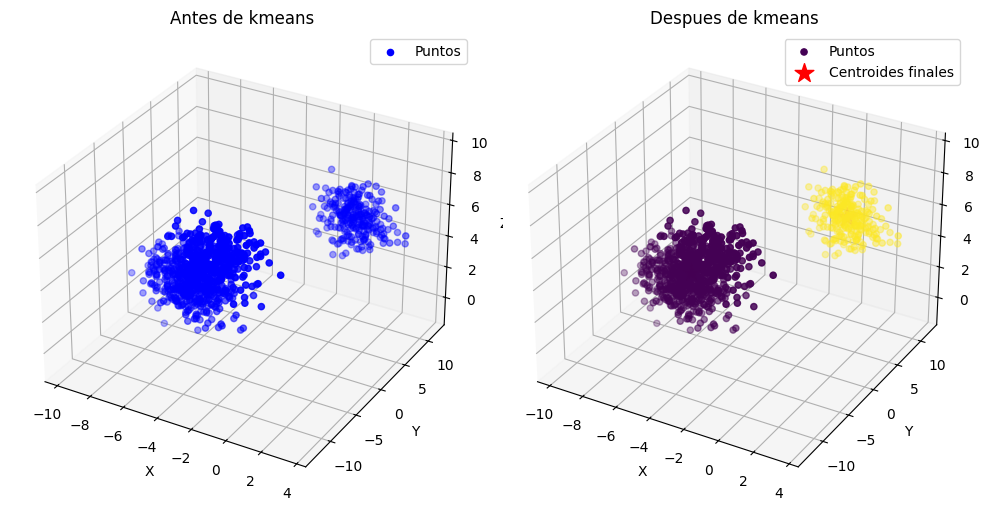

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=2, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

1000 iteraciones "K3"

[[-5.59637388 -3.77444934  2.9720632 ]
 [-1.87489628 -9.98410468  7.55642675]
 [ 0.28513392  8.92425092  5.20691558]]


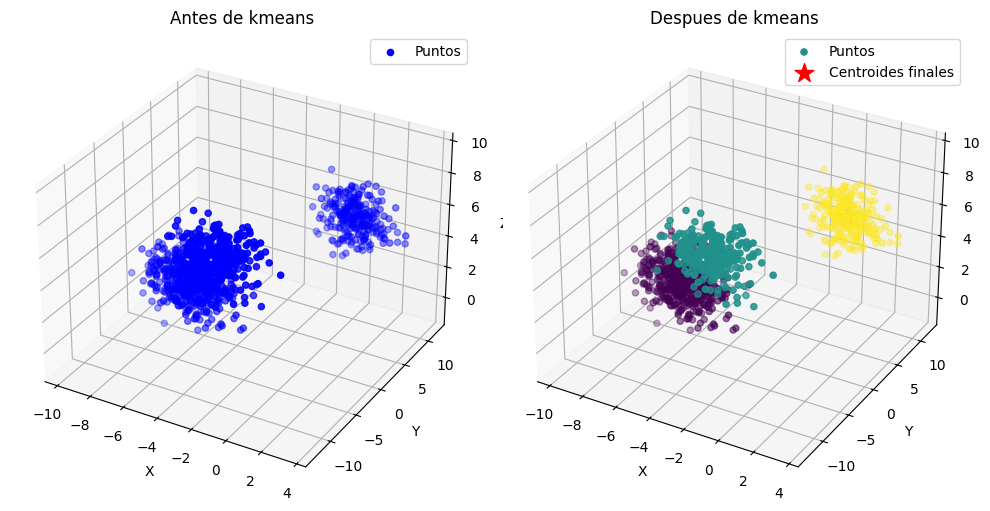

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

1000 itereaciones"K5"

[[  0.28513392   8.92425092   5.20691558]
 [ -6.76434336  -2.01109661   2.35585768]
 [ -4.75530328  -4.81523029   3.6441475 ]
 [ -1.86149261 -10.05708124   7.62571039]
 [ -4.01172472  -6.39206418   3.49885813]]


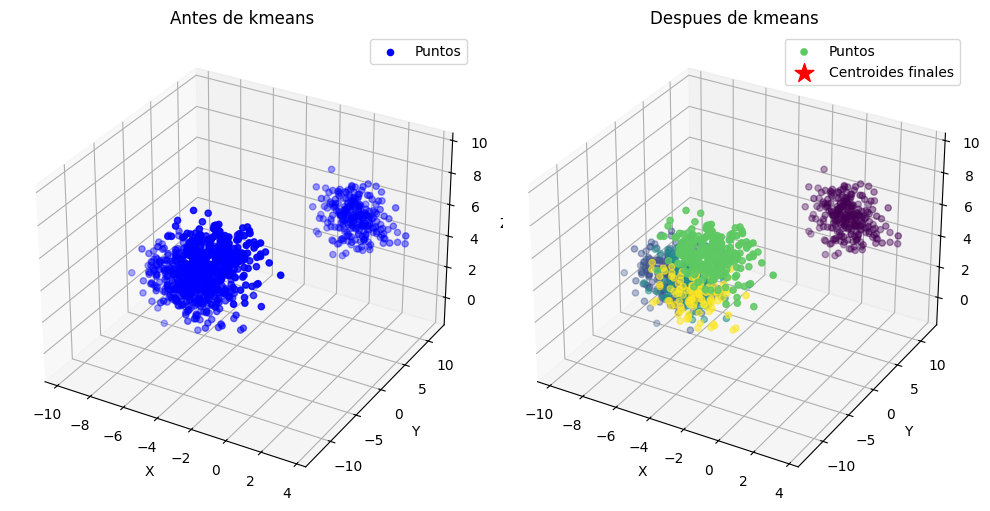

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=5, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

1000 iteraciones "K10"

[[  1.01374594   9.72691481   4.96207238]
 [ -6.7611662   -1.92466089   2.33006118]
 [ -1.29492125  -9.372929     7.13036035]
 [ -4.4735453   -6.24218265   4.07933997]
 [ -5.65538717  -4.62188155   3.34524689]
 [ -0.23739698   9.00073868   6.14790267]
 [ -2.2713458  -10.5295339    7.9719595 ]
 [ -3.55082703  -5.10245368   3.04963048]
 [  0.9325391    7.88578743   5.06500262]
 [ -0.55065067   8.89059931   4.27439361]]


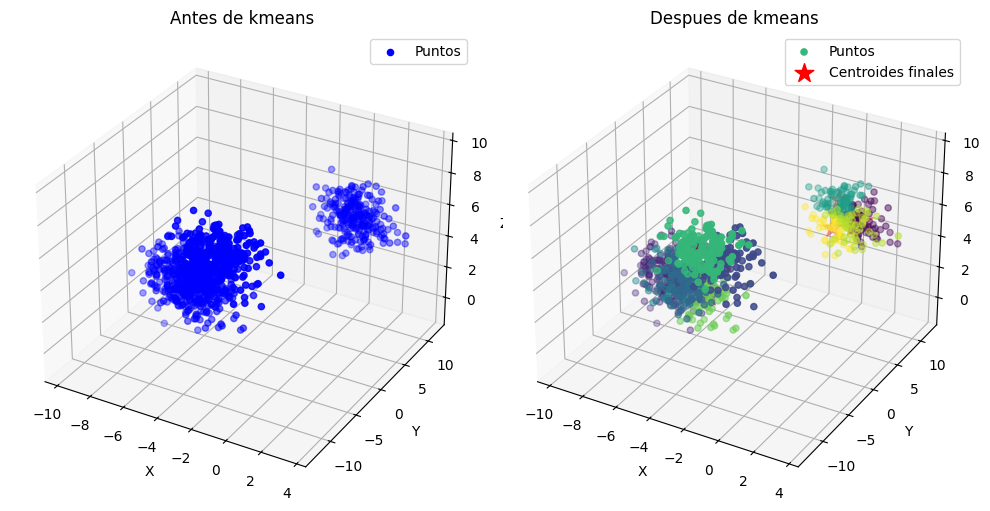

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 3,centers = 4,random_state = 23)
kmeans = KMeans(k=10, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar3D(points, kmeans.centroids, labels)

punto 6: 1000 muestras 2D K=5 distancia eucladiana, manhattan y mahalanobis, max iteraciones= 1000

distancia eucladiana

[[ 0.6929522   9.75446738]
 [-5.65576678  3.72665982]
 [ 5.22054811 -4.40112225]
 [-6.5964512  -2.15146931]
 [-0.0991097   8.28534972]]


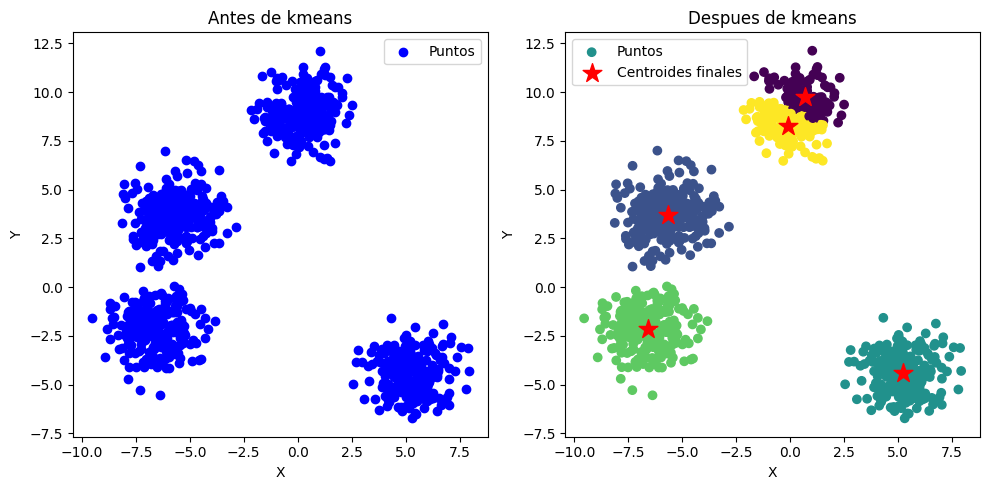

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=5, max_iter=1000)
labels = kmeans.run(points)
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)

distancia manhattan

[[ 5.1483788  -3.66276857]
 [ 0.24306104  8.92000855]
 [-6.59871777 -2.12592069]
 [ 5.31092229 -5.32572731]
 [-5.64587749  3.74810339]]


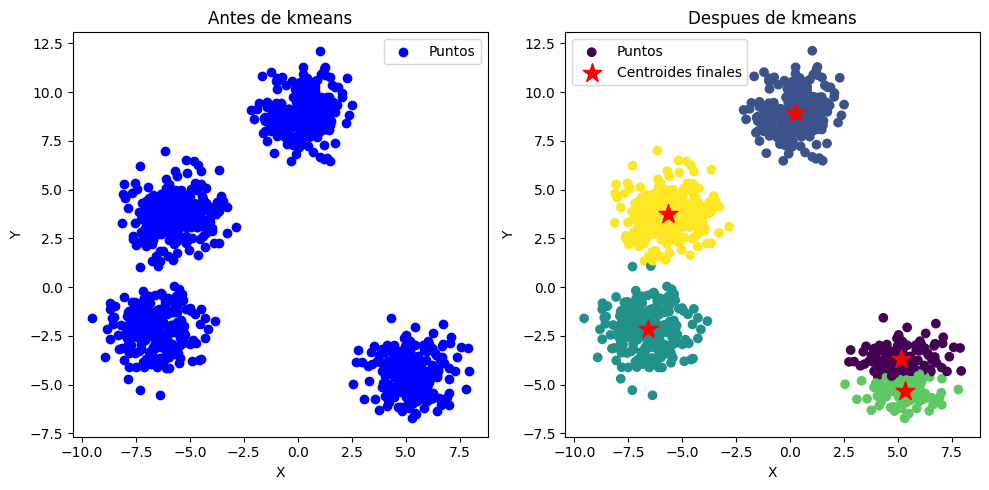

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=5, max_iter=1000)
labels = kmeans.run(points, tipo_distance="manhattan")
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)

distancia mahalanobis

[[-6.14739771  0.7245846 ]
 [ 5.7553902  -3.87698279]
 [ 0.70439777  9.43383229]
 [-0.58587301  8.11342439]
 [ 4.66831277 -4.94230689]]


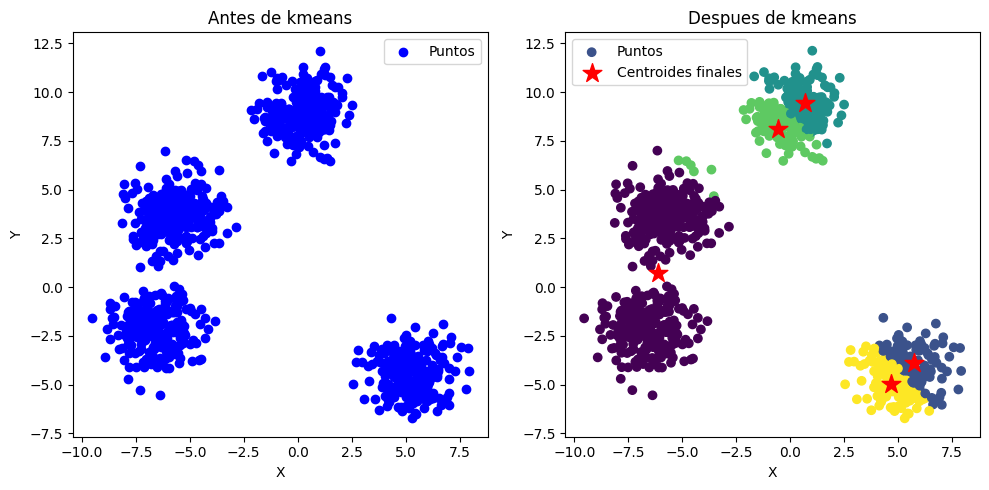

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 23)
kmeans = KMeans(k=5, max_iter=1000)
labels = kmeans.run(points, tipo_distance="mahalanobis")
#print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)